In [1]:
print()

In [2]:
import sys, os

project_root = os.path.abspath(os.path.join("..", ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

In [3]:
from src.enums.PathEnums import Paths
from pathlib import Path
import pickle
import random
import shutil

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms


In [6]:
def plot_image(image_path, label):
    
    img = Image.open(image_path)

    img_as_array = np.array(img)

    print(f"Image path: {image_path}")
    print(f"Image class: {label}")
    print(f"Image shape: {img_as_array.shape}")
    plt.imshow(img_as_array)
    plt.title(f"Random Image from '{label}' class")
    plt.axis('off')

In [7]:
import torchvision.transforms.functional as F

def plot_images(data, labels, transformed=False):

    n = len(data)
    fig, axes = plt.subplots(1, n, figsize=(n * 5, 5))  

    if n == 1:
        axes = [axes]  # If only 1 image, make sure axes is iterable

    if transformed:



        for i, (img, label) in enumerate(zip(data, labels)):
            # img is a tensor in [C, H, W]
            # img = F.to_pil_image(img)  # convert back to PIL
            img = img.permute(1, 2, 0)
            axes[i].imshow(img)
            axes[i].set_title(f"Image {label}")
            axes[i].axis("off")

    else:

        for i, image_path in enumerate(data):
            img = Image.open(image_path)
            axes[i].imshow(img)
            axes[i].set_title(f"Image {labels[i]}")
            axes[i].axis("off")

    # plt.suptitle(f"Random Images from '{category}' class", fontsize=16)
    plt.show()

In [8]:
class DatasetSplitter:

    def __init__(self):
        print("DatasetSplitter initialize...")

    def get_all_annotations(self):

        with open(os.path.join('../../', Paths.ANNOT_PKL.value), "rb") as f:
            videos_annot_dct = pickle.load(f)

        labels = set()
        all_annotations = []
        train_split = []
        valid_split = []
        test_split = []
        i_tr, i_v, i_ts, i_all = 0, 0, 0, 0

        train_ids = ["1", "3", "6", "7", "10", "13", "15", "16", "18", "22", "23", "31",
                    "32", "36", "38", "39", "40", "41", "42", "48", "50", "52", "53", "54"]


        val_ids = ["0", "2", "8", "12", "17", "19", "24", "26", "27", "28", "30", "33", "46", "49", "51"]

        for video_id, clips in videos_annot_dct.items(): # each video

            for clip_id, clip_data in clips.items():     # each clip

                category = clip_data['category']
                labels.add(category)

                for frame_id, boxes in clip_data["frame_boxes_dct"].items():    # Frames

                    # if str(frame_id) == str(clip_id) :
                        # print(f"===: {video_id} || {clip_id} || {frame_id}, {category}")
                    frame_path = f"{Paths.VIDEOS_ROOT.value}/{video_id}/{clip_id}/{frame_id}.jpg"
                    i_all+=1
                    all_annotations.append(
                        {
                            "path": os.path.join('../../', frame_path), 
                            "category": category
                        }
                    )
                    if str(video_id) in train_ids:
                        i_tr+=1
                        # if i_tr == 2:
                        #     print(f"{i_tr}_train: path: {frame_path}, category: {category}")
                            # plot_image(frame_path, category)
                        train_split.append({"path": os.path.join('../../', frame_path),   "category": category })
                    elif str(video_id) in val_ids:
                        i_v+=1
                        # if i_v == 3:
                        #     print(f"{i_v}_valid: path: {frame_path}, category: {category}")
                            # plot_image(frame_path, category)
                        valid_split.append({"path": os.path.join('../../', frame_path),   "category": category })
                    else:
                        i_ts+=1
                        # if i_ts == 1:
                        #     print(f"{i_ts}_test: path: {frame_path}, category: {category}")
                        #     plot_image(frame_path, category)
                        test_split.append({"path": os.path.join('../../', frame_path),   "category": category })

        print(i_tr, i_v, i_ts, i_tr+i_v+i_ts, i_all)


        random.shuffle(train_split)
        random.shuffle(valid_split)
        random.shuffle(test_split)
        random.shuffle(all_annotations)

        return all_annotations, train_split, valid_split, test_split, sorted(list(labels))
# ===================================
def split_data():
    print("Start DatasetSplitter...\n")

    splitter = DatasetSplitter()
    all_data, train_split, valid_split, test_split, labels = splitter.get_all_annotations()
    
    print("labels: ", labels, "\n")
    print(f"len data: {len(all_data)} || train: {len(train_split)} || valid: {len(valid_split)} || test: {len(test_split)}")
    print("==="*50, "\n")

    return train_split, valid_split, test_split, labels
# ==============================================
train_split, valid_split, test_split, labels = split_data()

Start DatasetSplitter...

DatasetSplitter initialize...
19368 12069 12033 43470 43470
labels:  ['l-pass', 'l-spike', 'l_set', 'l_winpoint', 'r-pass', 'r_set', 'r_spike', 'r_winpoint'] 

len data: 43470 || train: 19368 || valid: 12069 || test: 12033



In [9]:
# len data: 43470 || train: 19368 || valid: 12069 || test: 12033

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
set_seed(123)

In [10]:
def plot_transformed_images(image_paths_list, transform, seed=42):
    # random.seed(seed)
    set_seed(123)


    for image_path in image_paths_list:
        with Image.open(image_path) as f:
            # img_as_array = np.asarray(f)
            # print(f"Image shape: {img_as_array.shape}")
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {np.asarray(f).shape}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

In [11]:
lst_path_train1, lst_label_train1 = [], []

i=0
for d in train_split:
    lst_path_train1.append(d['path'])
    lst_label_train1.append(d['category'])
    print(d)
    i+=1
    if i==3:
        break

{'path': '../../data/volleyball/volleyball_/videos/6/1850/1850.jpg', 'category': 'l-spike'}
{'path': '../../data/volleyball/volleyball_/videos/50/15755/15753.jpg', 'category': 'l-pass'}
{'path': '../../data/volleyball/volleyball_/videos/22/50010/50005.jpg', 'category': 'r-pass'}


In [12]:
# data_transform = transforms.Compose([
#         transforms.Resize((256, 256)),
#         transforms.CenterCrop((224, 224)),
#         # transforms.Resize((224, 224)),
#         transforms.RandomRotation(15),
#         transforms.RandomApply([
#             transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1)
#         ], p=0.3),
#         transforms.RandomGrayscale(p=0.05),
#         transforms.RandomApply([
#         transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0))
#         ], p=0.3),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                             std=[0.229, 0.224, 0.225])
#     ])

set_seed(123)
data_transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop((224, 224)),
        # transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(p=0.1),
        transforms.RandomVerticalFlip(p=0.1),
        transforms.RandomRotation(15),
        transforms.RandomApply([
            transforms.ColorJitter(brightness=0.02, contrast=0.02, saturation=0.02)
        ], p=0.06),
        transforms.RandomGrayscale(p=0.05),
        transforms.RandomApply([
        transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 0.5))
        ], p=0.06),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225])
    ])

In [13]:
img = Image.open(lst_path_train1[0])
img_as_array = np.array(img)
print(f"Before Transform : {img_as_array.shape}") 
transformed_img = data_transform(img)
print(f"After Transform : {transformed_img.shape}")

Before Transform : (720, 1280, 3)
After Transform : torch.Size([3, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


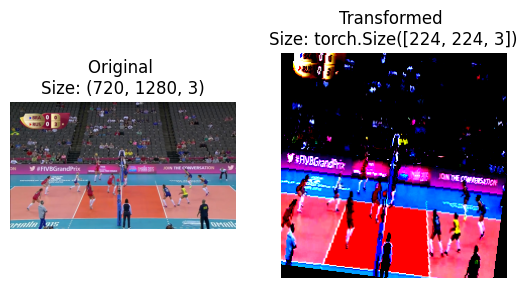

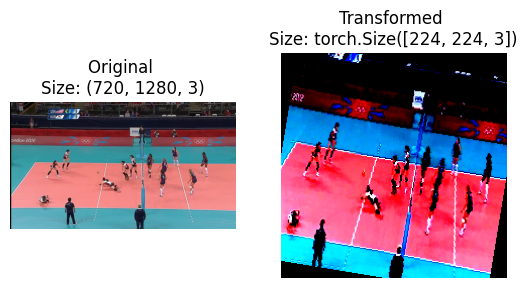

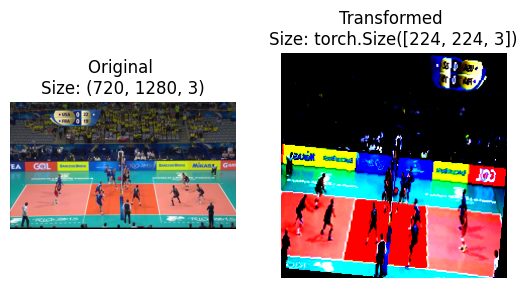

In [14]:
plot_transformed_images(lst_path_train1, 
                        transform=data_transform, 
                        )


In [15]:
class CustomDataset(Dataset):
    def __init__(self, data_split, labels, transform=None):
        """
        Args:
            data_split: list of dicts [{"path": ..., "category": ...}, ...]
            labels: full list of class labels
            transform: torchvision transforms
        """
        set_seed(123)
        
        self.data_split = data_split
        self.labels = labels
        self.class_to_idx = {cls_name: idx for idx, cls_name in enumerate(labels)}
        self.transform = transform

    def __len__(self):

        return len(self.data_split)

    def __getitem__(self, idx):

        item = self.data_split[idx]
        img = Image.open(item["path"]).convert("RGB")
        label = self.class_to_idx[item["category"]]

        if self.transform:
            img = self.transform(img)

        # return item["path"], img, label  # item["path"] Remove this (Fawzy...)
        return img, label

# ==============================================================================

def custom_data(train_split, valid_split, test_split, labels):
    print("Start CustomDataset...\n")
    set_seed(123)

   
    train_transforms = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop((224, 224)),
        # transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(p=0.1),
        transforms.RandomVerticalFlip(p=0.1),
        transforms.RandomRotation(15),
        transforms.RandomApply([
            transforms.ColorJitter(brightness=0.02, contrast=0.02, saturation=0.02)
        ], p=0.06),
        transforms.RandomGrayscale(p=0.05),
        transforms.RandomApply([
        transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 0.5))
        ], p=0.06),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225])
    ])


    test_transforms = transforms.Compose([
            transforms.Resize((128, 125)),
            transforms.CenterCrop((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406], 
                std=[0.229, 0.224, 0.225]
                )
        ])

    train_dataset = CustomDataset(train_split, labels, transform=train_transforms)
    valid_dataset = CustomDataset(valid_split, labels, transform=test_transforms)
    test_dataset  = CustomDataset(test_split,  labels, transform=test_transforms)

    print(f"len train : {len(train_dataset)}")
    print(f"len valid : {len(valid_dataset)}")
    print(f"len test : {len(test_dataset)}")  

    print(valid_dataset.labels)
    print(valid_dataset.class_to_idx)
    print("="*50, "\n")
    return train_dataset, valid_dataset, test_dataset
# =======================================================================
train_split, valid_split, test_split, labels = split_data()
print("\n==================================================================================\n")
train_dataset, valid_dataset, test_dataset = custom_data(train_split, valid_split, test_split, labels)

Start DatasetSplitter...

DatasetSplitter initialize...
19368 12069 12033 43470 43470
labels:  ['l-pass', 'l-spike', 'l_set', 'l_winpoint', 'r-pass', 'r_set', 'r_spike', 'r_winpoint'] 

len data: 43470 || train: 19368 || valid: 12069 || test: 12033



Start CustomDataset...

len train : 19368
len valid : 12069
len test : 12033
['l-pass', 'l-spike', 'l_set', 'l_winpoint', 'r-pass', 'r_set', 'r_spike', 'r_winpoint']
{'l-pass': 0, 'l-spike': 1, 'l_set': 2, 'l_winpoint': 3, 'r-pass': 4, 'r_set': 5, 'r_spike': 6, 'r_winpoint': 7}



In [16]:
tr_image, _ = train_dataset[0]
val_image, _ = valid_dataset[0]
tst_image, _ = test_dataset[0]

tr_image.shape, val_image.shape, tst_image.shape

(torch.Size([3, 224, 224]),
 torch.Size([3, 224, 224]),
 torch.Size([3, 224, 224]))

In [17]:
class_idx = train_dataset.class_to_idx
labels = train_dataset.labels
class_idx, labels

({'l-pass': 0,
  'l-spike': 1,
  'l_set': 2,
  'l_winpoint': 3,
  'r-pass': 4,
  'r_set': 5,
  'r_spike': 6,
  'r_winpoint': 7},
 ['l-pass',
  'l-spike',
  'l_set',
  'l_winpoint',
  'r-pass',
  'r_set',
  'r_spike',
  'r_winpoint'])

In [18]:
lst_path_train1, lst_path_train2 = [], []
lst_label_train1, lst_label_train2 = [], []

i=0
for d in train_split:
    lst_path_train1.append(d['path'])
    lst_label_train1.append(d['category'])
    print(d)
    i+=1
    if i==3:
        break
print("**********************================================***************************")
for i, (img, label) in enumerate(train_dataset):
    lst_path_train2.append(img)
    lst_label_train2.append(labels[label])
    # print(path, labels[label])
    print(labels[label])
    if i ==2:
        break

{'path': '../../data/volleyball/volleyball_/videos/52/10290/10287.jpg', 'category': 'r_spike'}
{'path': '../../data/volleyball/volleyball_/videos/23/30765/30767.jpg', 'category': 'r-pass'}
{'path': '../../data/volleyball/volleyball_/videos/23/30810/30805.jpg', 'category': 'l_winpoint'}
**********************================================***************************
r_spike
r-pass
l_winpoint


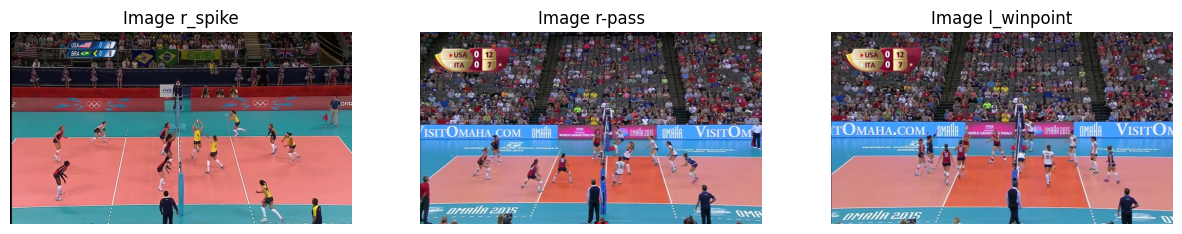

In [19]:
plot_images(lst_path_train1, lst_label_train1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


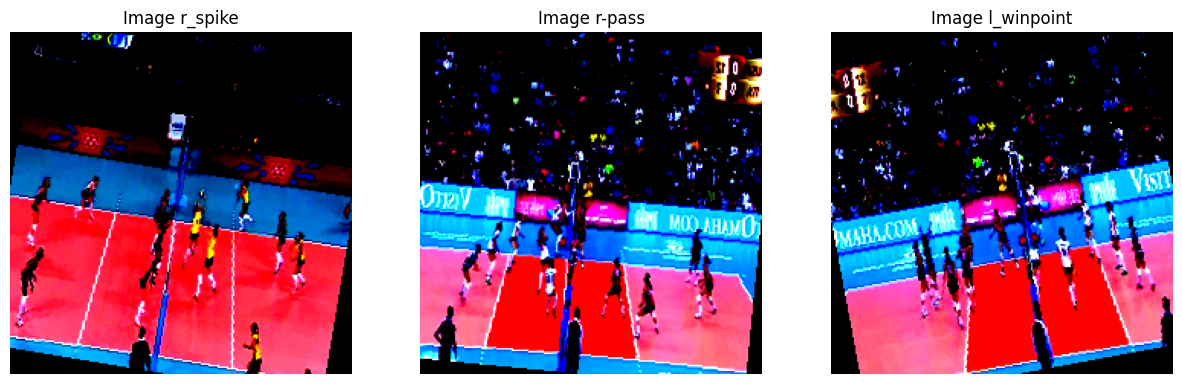

In [20]:
plot_images(lst_path_train2, lst_label_train2, transformed=True)

In [21]:
lst_path_tst1, lst_path_tst2 = [], []
lst_label_tst1, lst_label_tst2 = [], []

i=0
for d in test_split:
    lst_path_tst1.append(d['path'])
    lst_label_tst1.append(d['category'])
    print(d)
    i+=1
    if i==3:
        break
print("**********************================================***************************")
# for i, (path, img, label) in enumerate(test_dataset):
for i, (img, label) in enumerate(test_dataset):

    # lst_path_tst2.append(path)
    lst_path_tst2.append(img)
    lst_label_tst2.append(labels[label])
    # print(path, labels[label])
    print(labels[label])
    if i ==2:
        break

{'path': '../../data/volleyball/volleyball_/videos/5/63855/63858.jpg', 'category': 'r-pass'}
{'path': '../../data/volleyball/volleyball_/videos/35/33510/33506.jpg', 'category': 'r_winpoint'}
{'path': '../../data/volleyball/volleyball_/videos/35/26060/26058.jpg', 'category': 'l-spike'}
**********************================================***************************
r-pass
r_winpoint
l-spike


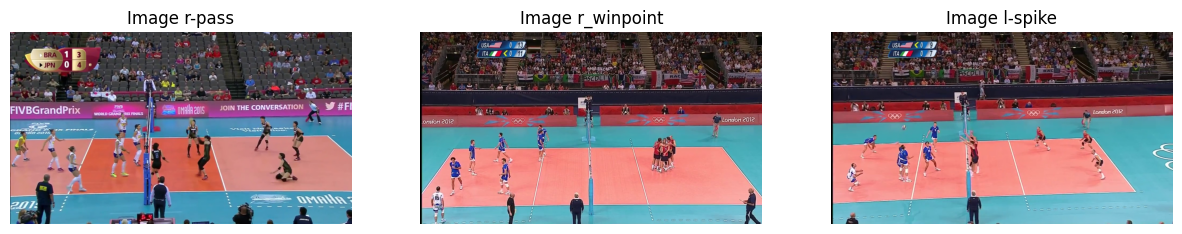

In [22]:
plot_images(lst_path_tst1, lst_label_tst1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


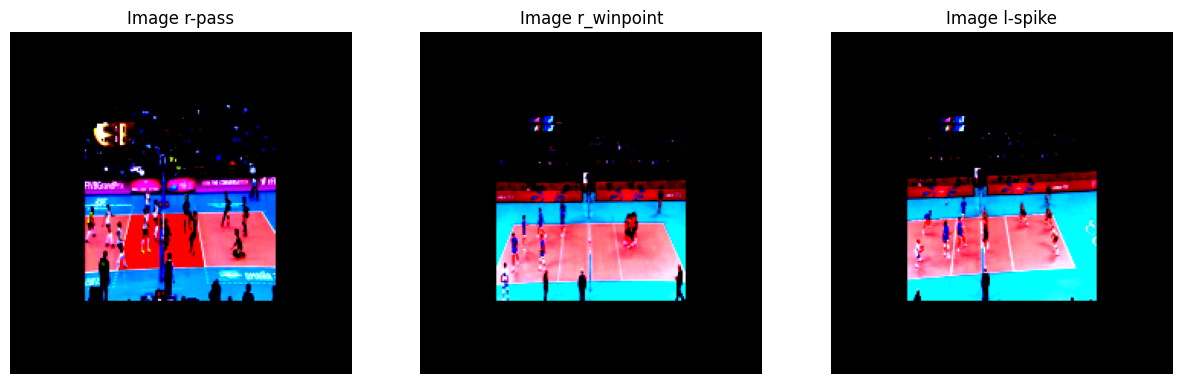

In [23]:
plot_images(lst_path_tst2, lst_label_tst2, transformed=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


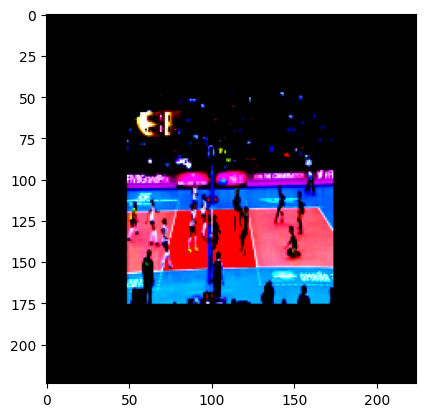

In [24]:
transformed_image = lst_path_tst2[0].permute(1, 2, 0) 
plt.imshow(transformed_image)

In [25]:
lst_path_val1, lst_path_val2 = [], []
lst_label_val1, lst_label_val2 = [], []

i=0
for d in valid_split:
    lst_path_val1.append(d['path'])
    lst_label_val1.append(d['category'])
    print(d)
    i+=1
    if i==3:
        break
print("**********************================================***************************")
# for i, (img, label) in enumerate(valid_dataset):
for i, (img, label) in enumerate(valid_dataset):

    # lst_path_val2.append(path)
    lst_path_val2.append(img)
    lst_label_val2.append(labels[label])
    # print(path, labels[label])
    print(labels[label])
    if i ==2:
        break

{'path': '../../data/volleyball/volleyball_/videos/28/20710/20706.jpg', 'category': 'r_spike'}
{'path': '../../data/volleyball/volleyball_/videos/26/51850/51846.jpg', 'category': 'r-pass'}
{'path': '../../data/volleyball/volleyball_/videos/8/58495/58492.jpg', 'category': 'r_spike'}
**********************================================***************************
r_spike
r-pass
r_spike


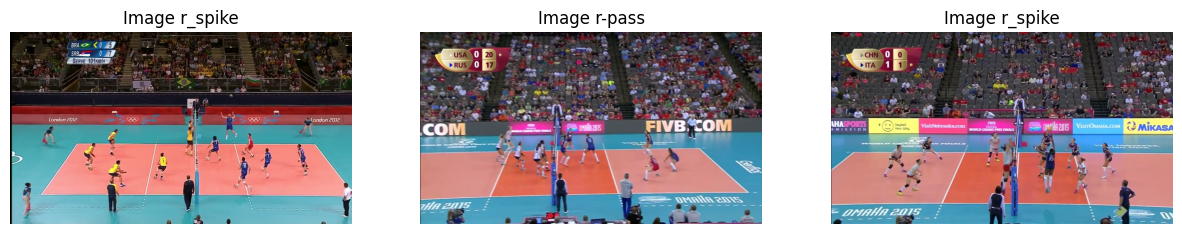

In [26]:
plot_images(lst_path_val1, lst_label_val1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


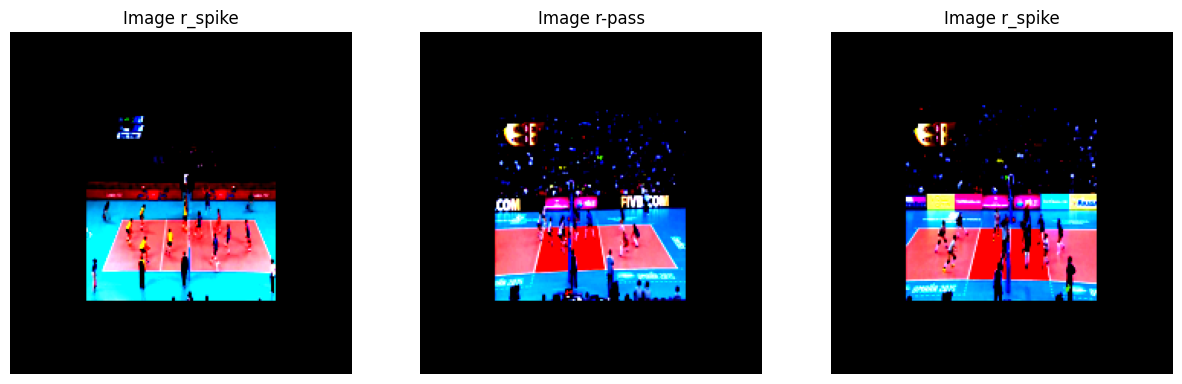

In [27]:
plot_images(lst_path_val2, lst_label_val2, transformed=True)

In [28]:
lst_path_train1[0]

'../../data/volleyball/volleyball_/videos/52/10290/10287.jpg'

In [29]:
print(train_dataset[0])

(tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -

In [30]:
image, label = train_dataset[0]
class_names = train_dataset.labels
class_to_idx = train_dataset.class_to_idx

In [31]:
class_names

['l-pass',
 'l-spike',
 'l_set',
 'l_winpoint',
 'r-pass',
 'r_set',
 'r_spike',
 'r_winpoint']

In [32]:
class_to_idx

{'l-pass': 0,
 'l-spike': 1,
 'l_set': 2,
 'l_winpoint': 3,
 'r-pass': 4,
 'r_set': 5,
 'r_spike': 6,
 'r_winpoint': 7}

In [33]:
print(image.shape)
print(label)
print(class_names[label])

torch.Size([3, 224, 224])
6
r_spike


In [34]:
def display_random_images(dataset,
                          classes,  #: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = 42):
    
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    
    if seed:
        random.seed(seed)

    random_samples_idx = random.sample(range(len(dataset)), k=n)
    print(random_samples_idx)

    plt.figure(figsize=(16, 8))

    for i, targ_sample in enumerate(random_samples_idx):
        path, targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1], dataset[targ_sample][2]

        targ_image_adjust = targ_image.permute(1, 2, 0)

        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

In [35]:
display_random_images(train_dataset, 
                      n=3, 
                      classes=class_names,
                      seed=None)

[1715, 8771, 2856]


IndexError: tuple index out of range

<Figure size 1600x800 with 0 Axes>

In [ ]:
display_random_images(valid_dataset, 
                      n=3, 
                      classes=class_names,
                      seed=None)

In [181]:
display_random_images(test_dataset,
                      n=3, 
                      classes=class_names,
                      seed=None)

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)
valid_dataloader = DataLoader(valid_dataset, batch_size=128, shuffle=False, num_workers=4)
test_dataloader  = DataLoader(test_dataset,  batch_size=128, shuffle=False, num_workers=4)

In [ ]:
# BATCH_SIZE = 32
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {train_dataloader.batch_size}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {test_dataloader.batch_size}")
print(f"Length of valid dataloader: {len(valid_dataloader)} batches of {valid_dataloader.batch_size}")


In [ ]:
print(train_dataloader.batch_size)
print(test_dataloader.dataset)

In [ ]:
l=0
for i in train_dataloader:  # i(list of tensors) ==> [Batch([32, 1, 28, 28]), labels([32])]
    print("Batch",l+1)
    # print(type(i)) # List
    print("size of i:", len(i))              # Size = 2 List 
    print("shape of batch data: i[0] :", i[0].shape,"labels:i[1] :", i[1].shape) # Tensor, Tensor
    print("shape of first image in batch", i[0][0].shape)
    l+=1
    if (l==2):
        break

In [ ]:
print("=========================")
for batch, i in enumerate (train_dataloader):  # c (Counter), i ==> [Batch([32, 1, 28, 28]), labels([32])]
    print("Batch", batch, "===> ", i[0].shape, i[1].shape)
    if batch == 5:
        break

In [ ]:
for batch, (images, labels) in enumerate(train_dataloader):
    print(f"Batch {batch + 1}:")  
    print(f"  Batch Images shape: {images.shape}")   # [32, 1, 28, 28]
    print(f"  Batch Labels shape: {labels.shape}")   # [32]
    
    print(f"  Single Images: {images[0].shape}")
    print(f"  Single Label: {labels[0].item()}")
    print(f"  Label: {class_names[labels[0].item()]}")
    break 

In [127]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

## Model

In [40]:
# !pip install torchinfo

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import models
from torchinfo  import summary

In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

In [ ]:
resnet50 = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)

In [ ]:
resnet50

In [ ]:
summary(resnet50, input_size=(32, 3, 224, 224))

In [ ]:
resnet50.fc

In [ ]:
def count_params(model):
    total = sum(p.numel() for p in model.parameters())
    trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total, trainable

total, trainable = count_params(resnet50)
print(f"\nTotal parameters: {total:,}")
print(f"Trainable parameters: {trainable:,}")

In [ ]:
resnet50_param_cpy = list(resnet50.parameters())

for param in resnet50_param_cpy:
    print(param.shape)
    print("Before:", param.requires_grad)
    param.requires_grad = False
    print("After :", param.requires_grad)
    break

In [ ]:
num_classes = len(class_names)
class_names, num_classes

In [ ]:
in_features = resnet50.fc.in_features
print("===================================")
resnet50.fc = nn.Linear(in_features, num_classes)
print(f" Final layer replaced: {in_features} → {num_classes}")
print(resnet50.fc)

In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

In [ ]:
image_tst = train_features_batch[0].unsqueeze(0)
image_tst.shape

In [ ]:
# dummy_input = torch.randn(1, 3, 224, 224)
out = resnet50(image_tst)
print("\nForward pass output shape:", out.shape)

In [ ]:
device = device or ("cuda" if torch.cuda.is_available() else "cpu")
print(device)
# Load pretrained ResNet50
model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
print("  Loaded pretrained ResNet50 (ImageNet weights)")


for param in model.parameters():
    param.requires_grad = False
print("   Backbone frozen (only final FC will train)")

# Replace final layer
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, num_classes)
print(f"   Final layer replaced: {in_features} → {num_classes}")

# Training components
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
model.to(device)


In [ ]:
train_dataloader

In [ ]:
from torchmetrics import Accuracy
acctorch = Accuracy(task="multiclass", num_classes=len(class_names))
from timeit import default_timer as timer
acctorch

In [92]:
model.train() # put model in train mode
train_loss, train_acc = 0.0, 0.0


for batch, (X, y) in enumerate(train_dataloader):
    # Send data to GPU
    X, y = X.to(device), y.to(device)

    print(f"X shape: {X.shape}, label shape: {y.shape}")

    # Forward
    y_pred = model(X)
    loss = criterion(y_pred, y)

        # Backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Metrics
    train_loss += loss.item()
    print("ACC Torch", acctorch(y_pred.argmax(dim=1), y))
    train_acc = acctorch(y_pred.argmax(dim=1), y)

    print(f"trai loss : {train_loss}")
    print(f"train acc : {train_acc}")
    print(f"Batch: =================> {batch}")
     break

# Calculate loss and accuracy per epoch and print out what's happening
avg_loss  = train_loss / len(train_dataloader)
avg_acc = acctorch.compute()
avg_acc = avg_acc.item()
print("ggg", avg_acc, avg_acc*100)
acctorch.reset()
print(f"Train loss: {avg_loss:.5f} | Train accuracy: {avg_acc:.2f}")


In [82]:
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):

    

    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() 
    with torch.inference_mode(): 
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            
            test_pred = model(X)   
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn,
               device: torch.device = device):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:

            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        
        # average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

In [ ]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [72]:
epochs_count = []
loss_values = []
test_loss_values = []
# Measure time
from timeit import default_timer as timer
torch.manual_seed(43)
train_time_start_on_gpu = timer()

epochs = 1
for epoch in range(1, epochs+1):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )
    train_time_end_on_gpu = timer()
    total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                                end=train_time_end_on_gpu,
                                                device=device)
  

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torchsummary import summary
from torchmetrics.classification import Accuracy
from timeit import default_timer as timer
from tqdm import tqdm

In [94]:
avg_acc, avg_acc*100

In [ ]:
class ResNet50Finetuner(nn.Module):
    def __init__(self, num_classes: int, freeze_backbone: bool = True, lr: float = 1e-3):
        """
        Fine-tuned ResNet50 model.

        Args:
            num_classes (int): number of classes in your dataset.
            freeze_backbone (bool): if True, freeze feature extractor and only train FC head.
            lr (float): learning rate for optimizer.
        """
        super().__init__()

        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        
        # Load pretrained ResNet50
        self.model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
        print("  Loaded pretrained ResNet50 (ImageNet weights)")

        # Freeze backbone if required
        if freeze_backbone:
            for param in self.model.parameters():
                param.requires_grad = False
            print("   Backbone frozen (only final FC will train)")
        else:
            print("   All layers are trainable")

        # Replace final layer
        in_features = self.model.fc.in_features
        self.model.fc = nn.Linear(in_features, num_classes)
        # for p in self.model.fc.parameters():
        #     p.requires_grad = True
        print(f"   Final layer replaced: {in_features} → {num_classes}")

        # Training components
        self.criterion = nn.CrossEntropyLoss()
        self.acctorch = Accuracy(task="multiclass", num_classes=num_classes).to(self.device)
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr)

        # self.scheduler = optim.lr_scheduler.StepLR(self.optimizer, step_size=3, gamma=0.1)

        self.model.to(self.device)

    def forward(self, x):
        return self.model(x)

    def explore(self, input_size=(1, 3, 224, 224)):
        """
        Print model summary and param counts.
        """
        print("\n--- Model Summary ---\n")
        summary(self.model, input_size=input_size)

        total = sum(p.numel() for p in self.model.parameters())
        trainable = sum(p.numel() for p in self.model.parameters() if p.requires_grad)
        print(f"\n   Total parameters: {total:,}")
        print(f"     Trainable parameters: {trainable:,}")

    def print_train_time(self, start: float, end: float):
        total_time = end - start
        print(f"Train time on {self.device}: {total_time:.3f} seconds")
        return total_time

    def train_step(self,
               data_loader: torch.utils.data.DataLoader
                ):
        
        self.model.train() # put model in train mode
        train_loss = 0.0


        for batch, (X, y) in enumerate(data_loader):
            # Send data to GPU
            X, y = X.to(self.device), y.to(self.device)

            # Forward
            y_pred = self.model(X)
            loss = self.criterion(y_pred, y)

             # Backward
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

            # Metrics
            train_loss += loss.item()
            self.acctorch(y_pred.argmax(dim=1), y)
    
        # Calculate loss and accuracy per epoch and print out what's happening
        avg_loss  = train_loss / len(data_loader)
        avg_acc = self.acctorch.compute()
        avg_acc = avg_acc.item()
        self.acctorch.reset()
        print(f"Train loss: {avg_loss:.5f} | Train accuracy: {avg_acc*100}")

        return avg_loss, avg_acc


    def test_step(self,
                data_loader: torch.utils.data.DataLoader
                ):
        
        self.model.eval() 
        test_loss = 0
        
        with torch.inference_mode(): 
            for X, y in data_loader:
                X, y = X.to(self.device), y.to(self.device)
                
                test_pred = self.model(X)
                loss = self.criterion(test_pred, y)


                test_loss += loss.item()
                self.acctorch(test_pred.argmax(dim=1), y)
            
            avg_loss  = test_loss / len(data_loader)
            avg_acc = self.acctorch.compute()
            avg_acc = avg_acc.item()
            self.acctorch.reset()
            print(f"Test loss: {avg_loss:.5f} | Test accuracy: {avg_acc}%\n")
            return avg_loss, avg_acc

    def train_model(self, train_dataloader, valid_dataloader, epochs=5):
        """
        Train the model with optional validation.

        Args:
            train_loader: DataLoader for training data
            valid_loader: DataLoader for validation data
            epochs (int): number of training epochs
        """
        history = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}
        
    
        start_time = timer()
        best_val_acc = 0

        for epoch in range(1, epochs+1):

            print(f"Epoch: {epoch}/{epochs}\n---------")
            train_loss, train_acc = self.train_step(train_dataloader)
            val_loss, val_acc = self.test_step(valid_dataloader)


            print(f"Train loss: {train_loss:.4f} | Train acc: {train_acc*100:.2f}%")
            print(f"Val   loss: {val_loss:.4f} | Val   acc: {val_acc*100:.2f}%")

            if val_acc > best_val_acc:
                best_val_acc = val_acc
                self.save_model("best_resnet50.pth")

            history["train_loss"].append(train_loss)
            history["train_acc"].append(train_acc)
            history["val_loss"].append(val_loss)
            history["val_acc"].append(val_acc)

        end_time = timer()
        total_train_time_model_1 = self.print_train_time(start=start_time,
                                                        end=end_time
                                                        )
        return history

    def predict(self, x: torch.Tensor):
        """Predict class for a single input tensor"""
        self.model.eval()
        with torch.inference_mode():
            x = x.unsqueeze(0).to(self.device)
            y_pred = self.model(x)
            return int(y_pred.argmax(dim=1).item())

    def save_model(self, path="resnet50.pth"):
        torch.save(self.model.state_dict(), path)
        print(f"Model saved to {path}")
    def load_model(self, path="resnet50.pth"):
        self.model.load_state_dict(torch.load(path, map_location=self.device))
        self.model.to(self.device)
        print(f"Model loaded from {path}")
    def plot_history(self, history: dict):
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.plot(history["train_loss"], label="Train Loss")
        plt.plot(history["val_loss"], label="Val Loss")
        plt.title("Loss")
        plt.legend()
        plt.subplot(1,2,2)
        plt.plot([x*100 for x in history["train_acc"]], label="Train Acc")
        plt.plot([x*100 for x in history["val_acc"]], label="Val Acc")
        plt.title("Accuracy")
        plt.legend()
        plt.show()

In [168]:

num_classes = 8  
model = ResNet50Finetuner(num_classes=num_classes, freeze_backbone=True)
model.explore(input_size=(1, 3, 224, 224))

# Test forward pass
dummy_input = torch.randn(1, 3, 224, 224)
out = model(dummy_input)
print("\nForward pass output shape:", out.shape)  # should be [1, num_classes]

In [ ]:


num_classes = 8
model = ResNet50Finetuner(num_classes=num_classes, freeze_backbone=True, lr=1e-3, use_scheduler=True)

model.explore(input_size=(1,3,224,224))

history = model.train_model(train_loader, val_loader, epochs=3)

model.plot_history(history)

sample_image, _ = val_dataset[0]  
pred_class = model.predict(sample_image)
print(f"Predicted class: {pred_class}")

In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image

num_classes = 8
device = "cuda" if torch.cuda.is_available() else "cpu"

model = models.resnet50(weights=None)
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, num_classes)

model.load_state_dict(torch.load(r"../../bbest_resnet50.pth", map_location=device))
model.to(device)
model.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
def predict_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0)  # إضافة بعد الـ batch
    image = image.to(device)

    with torch.inference_mode():
        outputs = model(image)
        predicted_class = outputs.argmax(dim=1).item()
    return predicted_class

# {'l-pass': 0, 'l-spike': 1, 'l_set': 2, 'l_winpoint': 3, 'r-pass': 4, 'r_set': 5, 'r_spike': 6, 'r_winpoint': 7}
# data/volleyball/volleyball_/videos/0/13286/13281.jpg ==> r_set
# 'path': 'data/volleyball/volleyball_/videos/31/31295/31295.jpg', r_spike


image_path = r"../../data/volleyball/volleyball_/videos/0/13286/13273.jpg"
# image_path = r"../../data/volleyball/volleyball_/videos/31/31295/31295.jpg"

pred_class = predict_image(image_path)
print(f"Predicted class: {pred_class}")